In [1]:
import pickle
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb

In [2]:
def plot_2outputs(m,xlim,x_1,x_2):
    fig = pb.figure(figsize=(12,8))
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    
    plt.xlabel('X',fontsize=16)
    plt.ylabel('Y',fontsize=16)
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1)
    ax1.plot(x[290:310],Flow[290:310],'rx')
    ax1.legend(loc=3)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2)
    ax2.plot(x[280:310],Pressure[280:310],'rx')
    ax2.legend(loc=3)

In [3]:
f1 = open('d:/Flow','rb')
Flow = pickle.load(f1)
f1.close()
f2 = open('d:/Pressure','rb')
Pressure = pickle.load(f2)
f2.close()

x = np.arange(0,310)[:,None]

Flow = Flow[:1676520]; Pressure = Pressure[:1676520]
Flow = np.mean(Flow.reshape(-1, 120), axis = 1)[:,None]; Pressure = np.mean(Pressure.reshape(-1, 120), axis = 1)[:,None]
# Flow = Flow[::30]; Pressure = Pressure[::30]

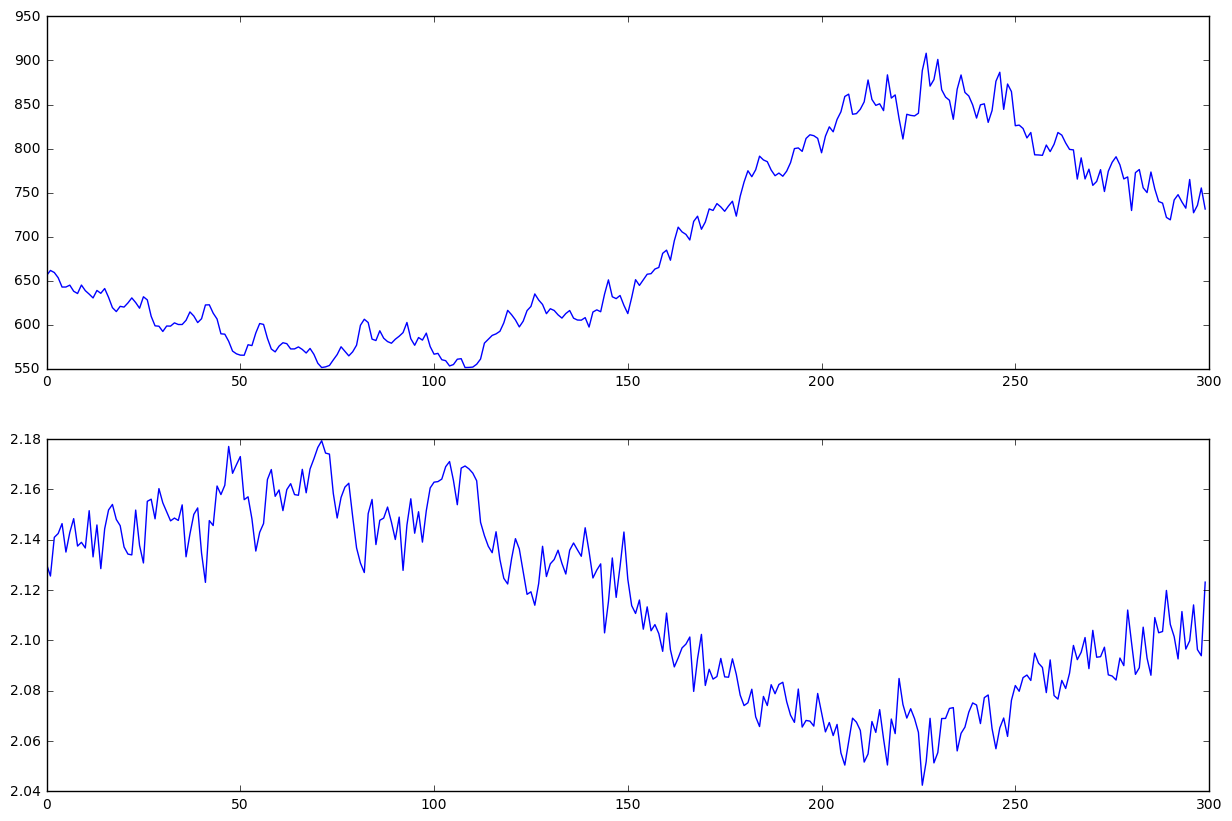

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(Flow[:300])
plt.subplot(212)
plt.plot(Pressure[:300])
plt.show()

In [5]:
F_t = Flow[:300]
P_t = Pressure[:300]

k1 = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=1)
k2 = GPy.kern.Matern32(input_dim=1, lengthscale=1, variance=1)
k3 = GPy.kern.Matern52(input_dim=1, lengthscale=1, variance=1)
k4 = GPy.kern.PeriodicMatern32(input_dim=1, lengthscale=1, variance=1)
k5 = GPy.kern.PeriodicMatern52(input_dim=1, lengthscale=1, variance=1)
k6 = GPy.kern.PeriodicExponential(input_dim=1, lengthscale=1, variance=1)

In [6]:
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=2, kernels_list=[k1,k6])
mul = GPy.models.GPCoregionalizedRegression([x[:290], x[:280]], [F_t[:290], P_t[:280]], kernel=lcm)
mul

gp.,value,constraints,priors
sum.ICM0.rbf.variance,1.0,+ve,
sum.ICM0.rbf.lengthscale,1.0,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.periodic_exponential.variance,1.0,+ve,
sum.ICM1.periodic_exponential.lengthscale,1.0,+ve,
sum.ICM1.periodic_exponential.period,6.28318530718,+ve,
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
mixed_noise.Gaussian_noise_0.variance,1.0,+ve,


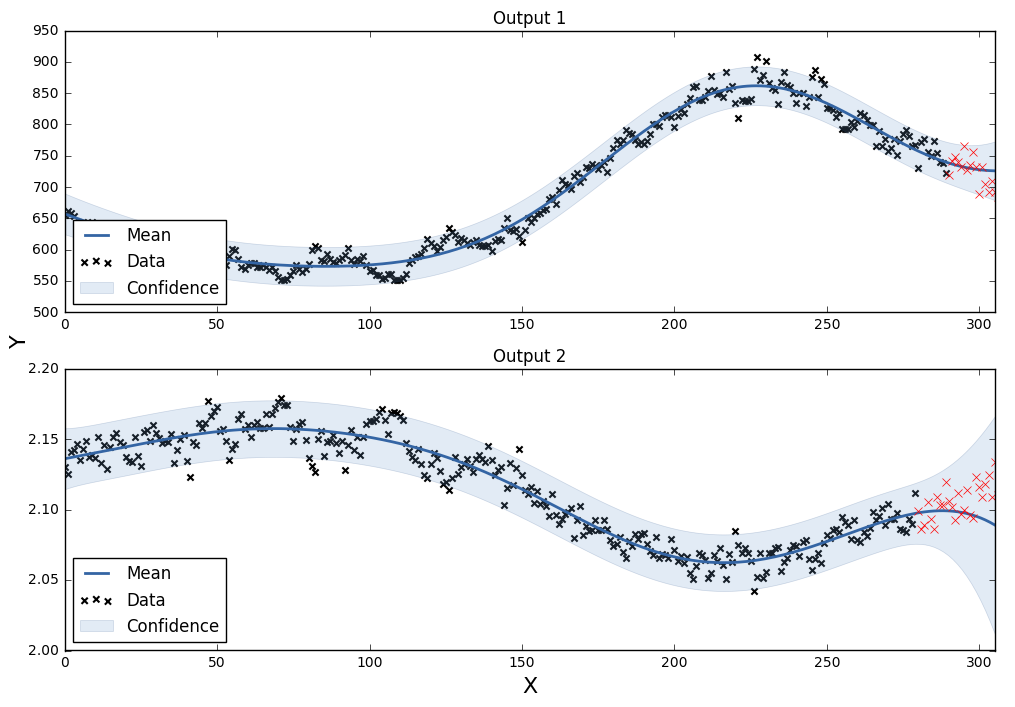

In [7]:
mul.optimize()

plot_2outputs(mul,[0,305],F_t[:290],P_t[:280])
plt.show()

In [8]:
'''
not inverse
k1, k6
k2, k3
k3, k6

inverse
k3
k2 k3
'''
mul

gp.,value,constraints,priors
sum.ICM0.rbf.variance,52.6651222773,+ve,
sum.ICM0.rbf.lengthscale,81.5944177932,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.periodic_exponential.variance,5.94597821943e-134,+ve,
sum.ICM1.periodic_exponential.lengthscale,137.732695559,+ve,
sum.ICM1.periodic_exponential.period,5.13789611127,+ve,
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
mixed_noise.Gaussian_noise_0.variance,243.114884007,+ve,
